# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [4]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-04-29 19:26:09--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-04-29 19:26:09--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738615 (721K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.1’

clientes_segmento

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('clientes_segmentos (1).csv')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           15000 non-null  object
 1   edad                 15000 non-null  int64 
 2   genero               15000 non-null  object
 3   ingresos             15000 non-null  int64 
 4   plataforma           15000 non-null  object
 5   interacciones        15000 non-null  int64 
 6   compras              15000 non-null  int64 
 7   total_gastado        15000 non-null  int64 
 8   fecha_ultima_compra  15000 non-null  object
 9   costo_adquisicion    15000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.1+ MB


In [7]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [8]:
unique_customers = df['id_cliente'].nunique()
platform_distribution = df.groupby('plataforma')['id_cliente'].nunique()

print(f"Número de clientes únicos: {unique_customers}")
print("\nDistribución por plataforma:")
platform_distribution

Número de clientes únicos: 15000

Distribución por plataforma:


,id_cliente
plataforma,
Facebook,5288
Instagram,5972
TikTok,3740


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


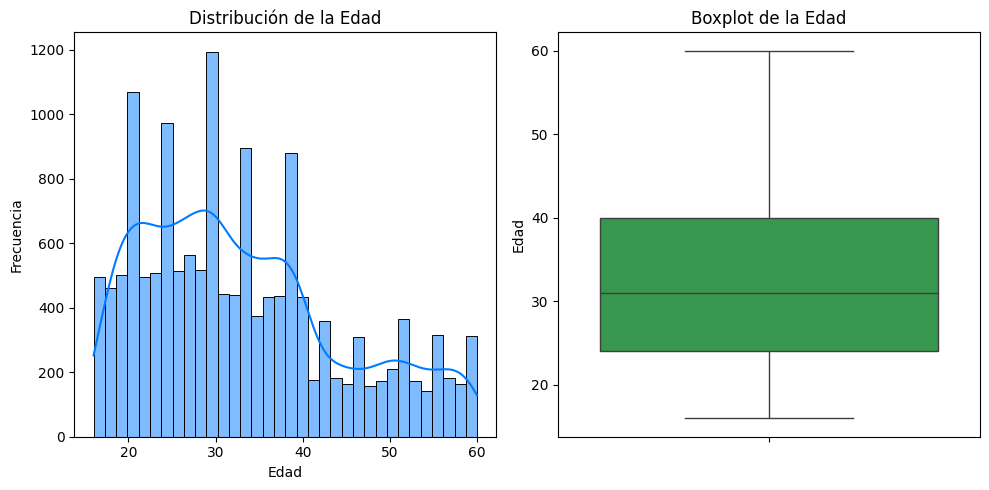

In [9]:
corporate_colors = ['#007bff', '#28a745', '#dc3545', '#ffc107']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['edad'], kde=True, color=corporate_colors[0])
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['edad'], color=corporate_colors[1])
plt.title('Boxplot de la Edad')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()

### P3. ¿Existe correlación entre ingresos y total_gastado?


RTA: Existe una correlaciòn positiva entre el ingreso y el gasto total.

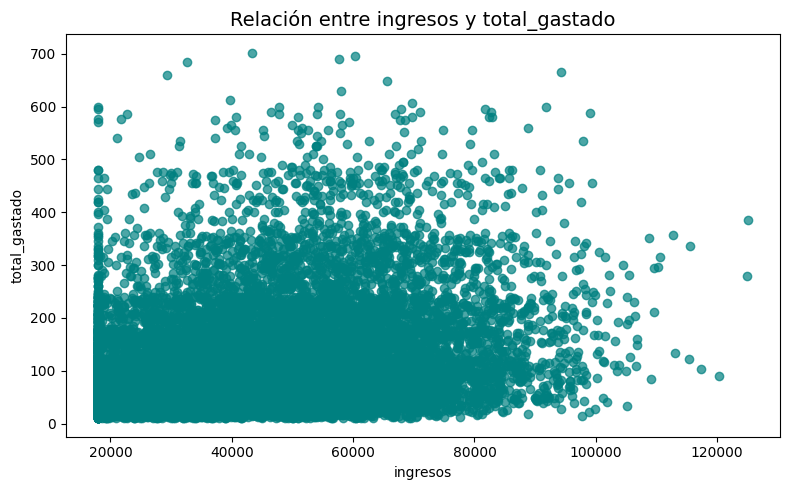

Coeficiente de correlación de Pearson: 0.2554721233489521


In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df['ingresos'], df['total_gastado'], color='teal', alpha=0.7)
plt.title('Relación entre ingresos y total_gastado', fontsize=14)
plt.xlabel('ingresos')
plt.ylabel('total_gastado')
plt.tight_layout()
plt.show()

correlation = df['ingresos'].corr(df['total_gastado'])
print(f"Coeficiente de correlación de Pearson: {correlation}")

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [11]:
from datetime import datetime

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)

In [12]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000


In [13]:
df['LTV'] = (df['total_gastado'] / df['compras'] )* df['frecuencia_mensual']

In [14]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000


### P4. CAC vs LTV por plataforma

In [15]:
ltv_cac_by_platform = df.groupby('plataforma')[['LTV', 'costo_adquisicion']].mean()

print(ltv_cac_by_platform)

                  LTV  costo_adquisicion
plataforma                              
Facebook    55.092580          25.039334
Instagram   26.037869          17.488948
TikTok      16.686795          12.598128


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['edad', 'ingresos', 'total_gastado']])

In [17]:
clusterfijo = 4
kmeans = KMeans(n_clusters=clusterfijo, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [18]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV,Cluster
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315,2
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742,0
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408,2
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000,2
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000,2


In [19]:
df.groupby('Cluster')[['ingresos', 'edad', 'total_gastado']].mean()

,ingresos,edad,total_gastado
Cluster,,,
0,51357.426576,31.127294,82.470072
1,66526.244685,50.128359,138.781388
2,26819.456916,24.936347,75.664635
3,50833.638539,42.977330,327.902393


### P5. Visualiza clusters

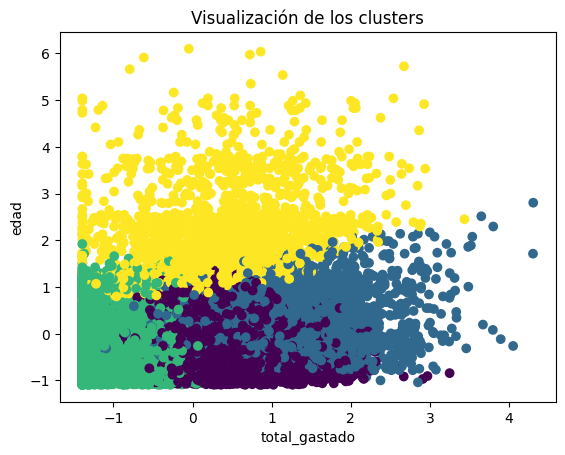

In [20]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='viridis')
plt.xlabel('total_gastado')
plt.ylabel('edad')
plt.title('Visualización de los clusters')
plt.show()

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [21]:
df['ganancia'] = df['LTV'] - df['costo_adquisicion']
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV,Cluster,ganancia
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315,2,-2.519685
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742,0,0.824742
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408,2,17.786408
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000,2,59.000000
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000,2,13.750000


### P6. Ganancia promedio por cluster

In [22]:
ganancia_plataforma = df.groupby('plataforma')[['ganancia']].mean()

print(ganancia_plataforma)

             ganancia
plataforma           
Facebook    30.053246
Instagram    8.548920
TikTok       4.088667


### P7. Género por cluster


In [23]:
clusteredad = df.groupby('Cluster')[['edad']].mean()

print(clusteredad)

              edad
Cluster           
0        31.127294
1        50.128359
2        24.936347
3        42.977330


### P8. Plataforma por cluster


In [24]:
clusterplataforma = df.groupby('Cluster')[['plataforma']].value_counts()

print(clusterplataforma)

Cluster  plataforma
0        Instagram     2797
         TikTok        1147
         Facebook      1068
1        Facebook      2348
         Instagram      145
2        Instagram     2906
         TikTok        2592
         Facebook       409
3        Facebook      1463
         Instagram      124
         TikTok           1
Name: count, dtype: int64


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


**Adultos con Ingresos Altos, Gastos Bajos :** Este grupo representa a personas adultas que, a pesar de tener altos ingresos, mantienen un estilo de vida bajo, con gastos relativamente bajos.

**Mayores con Ingresos Altos, Gastos Medios:** Este cluster incluye a personas mayores  de 50 años que disfrutan de ingresos altos, lo que les permite llevar un estilo de vida cómodo, con gastos medios.

**Jóvenes con Ingresos Bajos, Gastos Bajos :** Aquí se agrupan a los jóvenes que enfrentan menores ingresos y, debido a ello, también tienen gastos bajos.

**Adultos con Ingresos Altos, Gastos Altos :** Este grupo describe a adultos que no solo tienen altos ingresos, sino que también realizan gastos elevados.

In [37]:
cluster_names = {
    0: "Adultos con Ingresos Altos, Gastos Bajos",
    1: "Mayores con Ingresos Altos, Gastos Medios",
    2: "Jovenes con Ingresos Bajos, Gastos Bajos",
    3: "Adultos con Ingresos Altos, Gastos Altos"
}

In [41]:
df['cluster_names'] = df['Cluster'].map(cluster_names)

In [42]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV,Cluster,ganancia,Ratio,cluster_names
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315,2,-2.519685,0.874016,"Jovenes con Ingresos Bajos, Gastos Bajos"
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742,0,0.824742,1.082474,"Adultos con Ingresos Altos, Gastos Bajos"
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408,2,17.786408,2.111650,"Jovenes con Ingresos Bajos, Gastos Bajos"
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000,2,59.000000,6.363636,"Jovenes con Ingresos Bajos, Gastos Bajos"
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000,2,13.750000,1.597826,"Jovenes con Ingresos Bajos, Gastos Bajos"


### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

In [43]:
df['Ratio'] = df['LTV'] / df['costo_adquisicion']

In [44]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,total_gastado,fecha_ultima_compra,costo_adquisicion,dias_desde_ultima,frecuencia_mensual,LTV,Cluster,ganancia,Ratio,cluster_names
0,C00000,24,M,29869,Instagram,35,2,74,2024-12-25,20,97,0.472441,17.480315,2,-2.519685,0.874016,"Jovenes con Ingresos Bajos, Gastos Bajos"
1,C00001,38,M,77827,Instagram,36,1,35,2025-01-24,10,67,0.309278,10.824742,0,0.824742,1.082474,"Adultos con Ingresos Altos, Gastos Bajos"
2,C00002,39,M,18000,Instagram,25,2,116,2025-01-18,16,73,0.582524,33.786408,2,17.786408,2.111650,"Jovenes con Ingresos Bajos, Gastos Bajos"
3,C00003,20,F,42914,Instagram,29,4,112,2025-03-14,11,18,2.500000,70.000000,2,59.000000,6.363636,"Jovenes con Ingresos Bajos, Gastos Bajos"
4,C00004,38,M,30536,Instagram,33,3,147,2025-01-01,23,90,0.750000,36.750000,2,13.750000,1.597826,"Jovenes con Ingresos Bajos, Gastos Bajos"


In [47]:
clusterRatio = df.groupby('cluster_names')[['Ratio']].mean()

print(clusterRatio)

                                              Ratio
cluster_names                                      
Adultos con Ingresos Altos, Gastos Altos   4.181791
Adultos con Ingresos Altos, Gastos Bajos   1.495864
Jovenes con Ingresos Bajos, Gastos Bajos   1.553069
Mayores con Ingresos Altos, Gastos Medios  1.778187


In [48]:
cluster_summary = df.groupby('cluster_names').agg(
    LTV_mean=('LTV', 'mean'),
    CAC_mean=('costo_adquisicion', 'mean'),
    Ganancias_mean=('ganancia', 'mean'),
    Total_clientes=('id_cliente', 'count')
)

cluster_summary

,LTV_mean,CAC_mean,Ganancias_mean,Total_clientes
cluster_names,,,,
"Adultos con Ingresos Altos, Gastos Altos",96.301177,24.470403,71.830774,1588
"Adultos con Ingresos Altos, Gastos Bajos",24.337401,18.007781,6.329619,5012
"Jovenes con Ingresos Bajos, Gastos Bajos",22.365963,15.862367,6.503596,5907
"Mayores con Ingresos Altos, Gastos Medios",41.000910,24.531087,16.469823,2493


### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología